<a href="https://colab.research.google.com/github/cesouza-ufsm/dinamica-estrutural/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

# Dynamics - structural


In [ ]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la
from numpy.linalg import inv
from math import pi as Pi
from math import floor
from scipy.integrate import odeint


#----------------------------------    
# function that returns dy/dt
def compute_dqdt(q,t,A):
   
    dqdt = np.empty((4,))        

    dqdt = np.dot(A , q)
    
    return dqdt

#----------------------------------
UD=2
#model dada
m =10
mC=m
mB=3*m
mF=UD*9
g=9.81
L = 1.5
k=10000 
kt=k*.5
c = 500
 

#initial conditions
x10=0.0
x20=0.0
v10=1.0
v20=0.0

#system matrices
ngl = 2
M=np.array([[mC+mB+mF   , (mB/2+mF)*L],
            [(mB/2+mF)*L, (mB/3+mF)*L**2]])

C=np.array([[c, 0 ],
            [0 , 0]])


K=np.array([[k, 0],
            [0, kt+(mF+mB/2)*g*L]])

q0 = np.empty((4,))
        
#q0 = np.zeros((2*ngl))

q0[0] = x10;
q0[1] = x20;
q0[2] = v10;
q0[3] = v20;


#modal analysis

D,V=la.eig(np.dot(inv(M),K))

print(V)
#Obtendo as frequências
omega1=np.sqrt(D[1])
omega2=np.sqrt(D[0])

print( ' frequencies')
print( '1', omega1,omega1/2/Pi)
print( '2', omega2,omega2/2/Pi)

#Ajustando os autovetores
v1 = V[:,1]
v2 = V[:,0]

v1 = v1/v1[0]
v2 = v2/v2[0]


print('autovetores normalizados\n',v1,v2)


'''   
simulando no espaço de estados
'''
# cria o modelo no espaco de estados

A=np.zeros((2*ngl,2*ngl))

A[0  :ngl  ,ngl:2*ngl] = np.identity(ngl)
A[ngl:2*ngl,  0  :ngl] = np.dot(-inv(M),K)
A[ngl:2*ngl,ngl:2*ngl] = np.dot(-inv(M),C)

print('matrix A\n',A)

# time points
dt = 0.005
tf = 5
Nt = floor(tf/dt)
t = np.linspace(0,tf,Nt)

q = odeint(compute_dqdt,q0,t, args=(A, ))

# google python odeint 

# plot 
fig, axs = plt.subplots(2)

axs[0].plot(t,q[:,0],label=r'$x$')
axs[0].plot(t,q[:,1],label=r'${\theta}$')
axs[0].set(ylabel='$x$(t)')

axs[1].plot(t,q[:,2],label=r'$\dot x$')
axs[1].plot(t,q[:,3],label=r'$\dot{\theta}$')
axs[1].set(xlabel='time t(s)')
axs[1].set(ylabel='$\dot x$(t)')
leg = axs[0].legend();
leg = axs[1].legend();

plt.show()



In [ ]:
Dynamics


# New section

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or 'Colab' for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

## <strong>Getting started</strong>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [2]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [3]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

## Data science

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

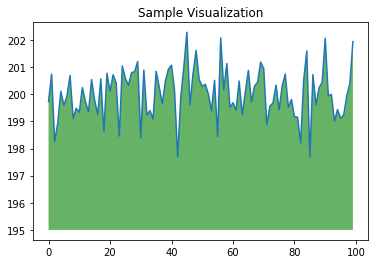

In [4]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

## More resources

### Working with notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with data
- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine learning crash course
These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [TensorFlow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine learning examples

To see end-to-end examples of the interactive machine-learning analyses that Colaboratory makes possible, take a look at these tutorials using models from <a href="https://tfhub.dev">TensorFlow Hub</a>.

A few featured examples:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
